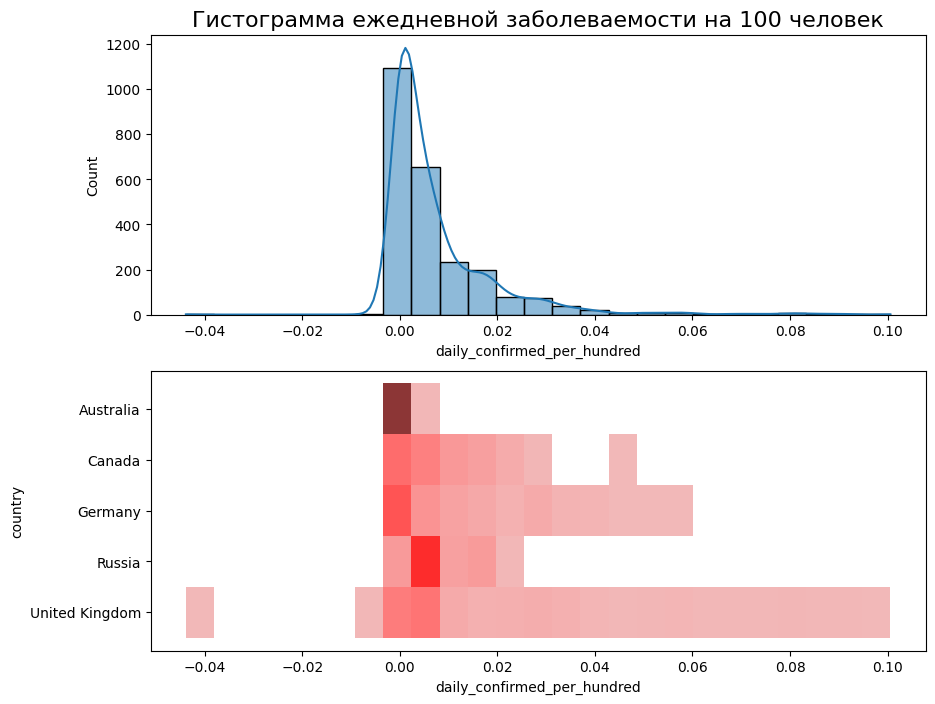

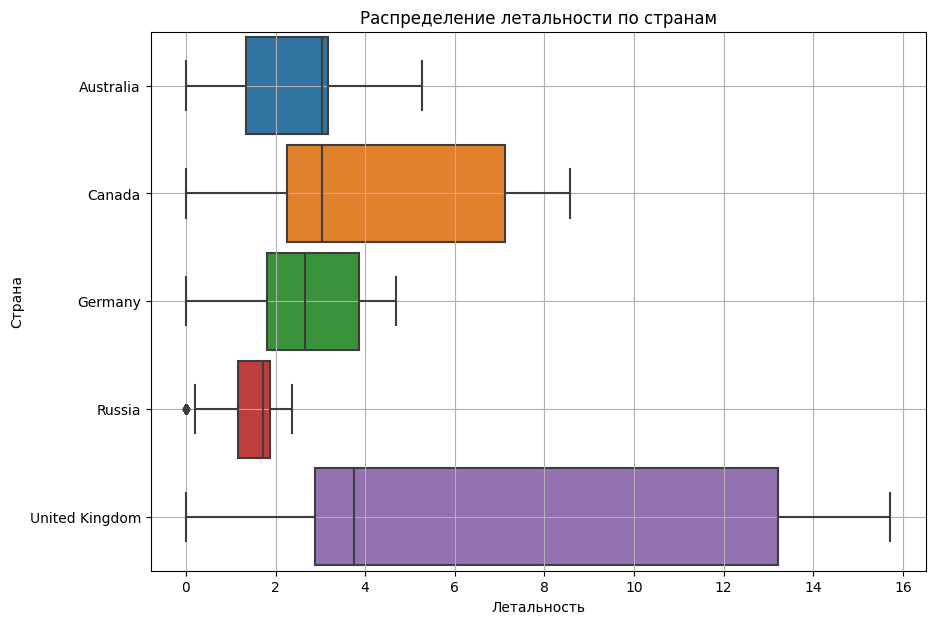

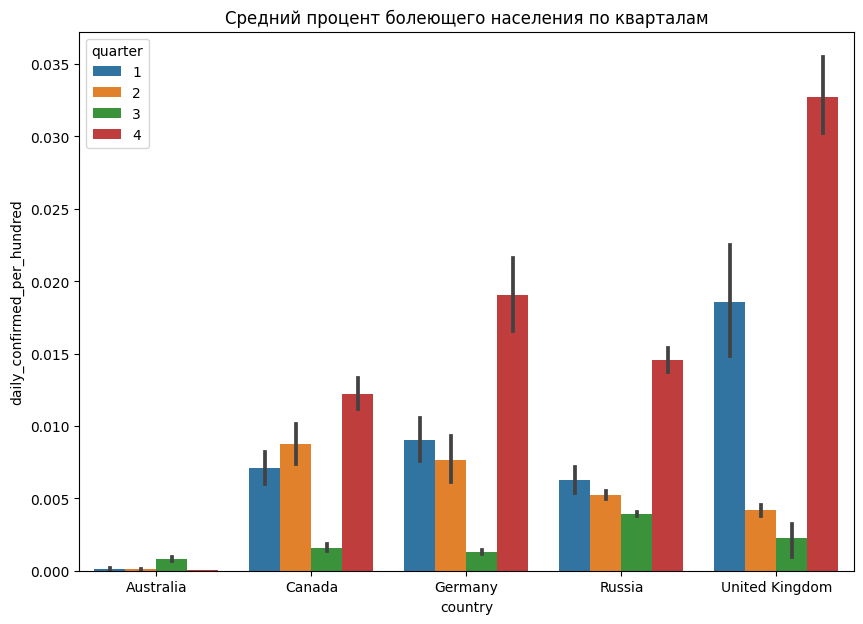

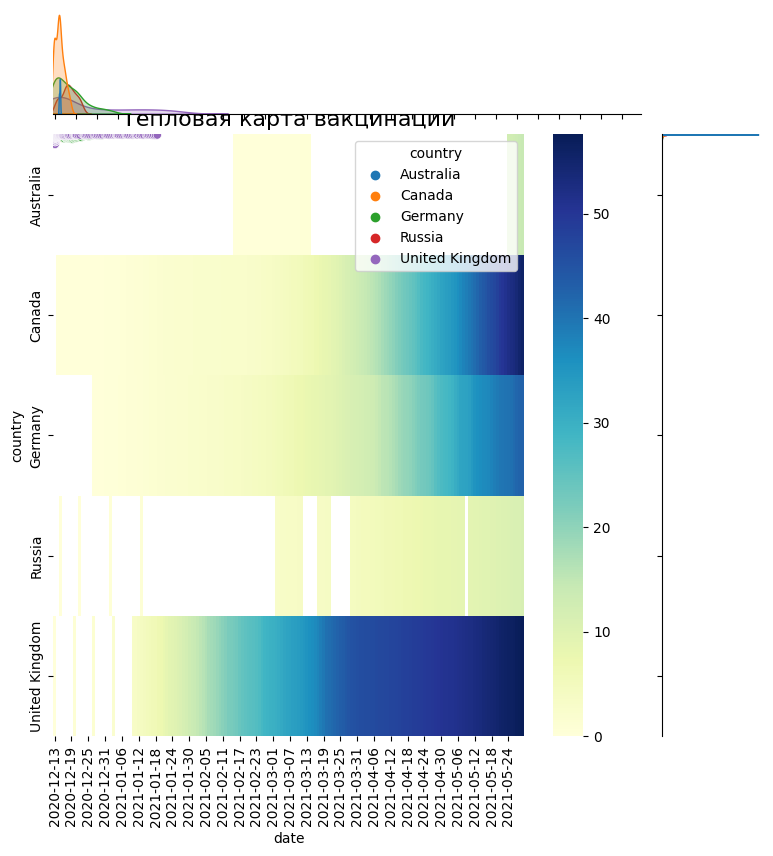

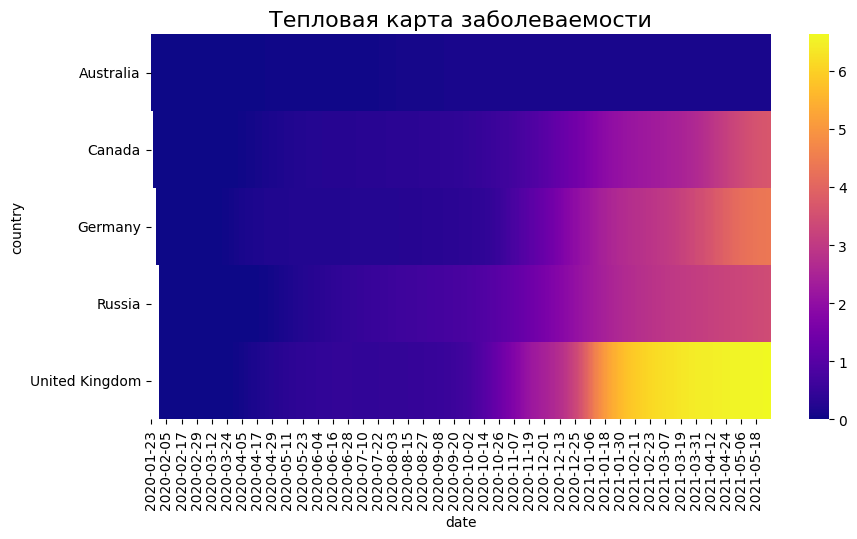

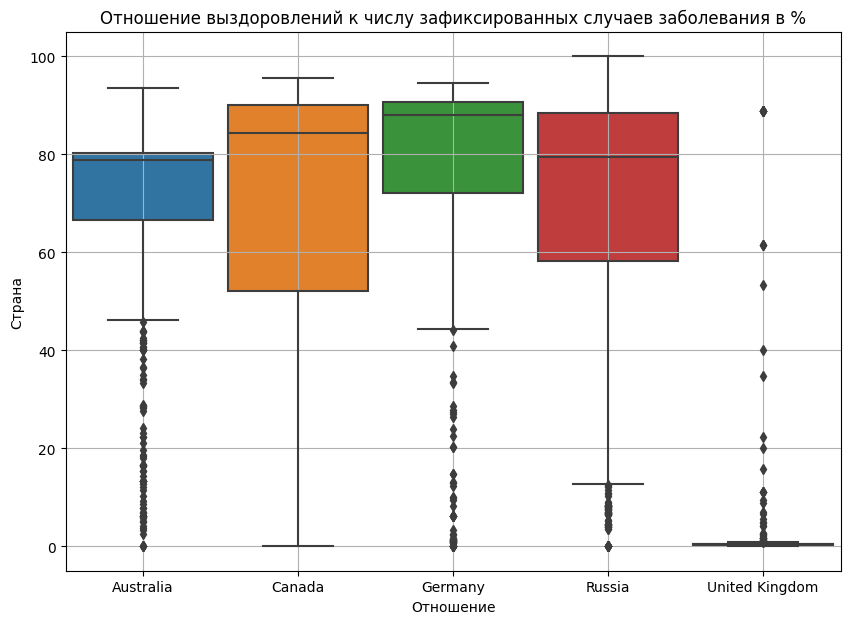

In [13]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
covid_data.head()
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid_data = covid_data.groupby(['date','country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date']= pd.to_datetime(covid_data['date'])
covid_data['active']= covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']#еще болеют
covid_data = covid_data.sort_values(by= ['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()#прирост заболеваемости
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()#прирост смертности
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()#прирост выздоровевших
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
#print(f"Данные о заболеваемости предоставлены от {vaccinations_data['date'].min()} до  {vaccinations_data['date'].max()}")
covid_df = covid_data.merge(vaccinations_data, how='left', on=['date', 'country'])
covid_df['death_rate'] = covid_df['deaths'] /covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100
#print(round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2))
#print(round(covid_df[covid_df['country']=='Russia']['recover_rate'].mean(), 2))
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
import matplotlib.pyplot as plt
import seaborn as sns
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()
fig, axes= plt.subplots(nrows=2, ncols=1, figsize =(10,8))
sns.histplot(data = croped_covid_df, x= 'daily_confirmed_per_hundred',bins=25, kde=True, ax=axes[0])
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);
fig=plt.figure(figsize=(10,7))
boxplot = sns.boxplot(data=croped_covid_df, y = 'country',x='death_rate',  orient='h',
    width=0.9)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');
jointplot = sns.jointplot(data=croped_covid_df, x = 'people_fully_vaccinated_per_hundred', y = 'daily_confirmed_per_hundred',hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,)
pivot = croped_covid_df.pivot_table(values = 'people_vaccinated_per_hundred',columns='date',
    index='country',
)
pivot.columns= pivot.columns.astype('string')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)
fig= plt.figure(figsize = (10,7))
boxplot= sns.boxplot(data=croped_covid_df, y='recover_rate',x = 'country', orient='v',width=0.9
)
boxplot.set_title('Отношение выздоровлений к числу зафиксированных случаев заболевания в %');
boxplot.set_xlabel('Отношение');
boxplot.set_ylabel('Страна');
boxplot.grid()







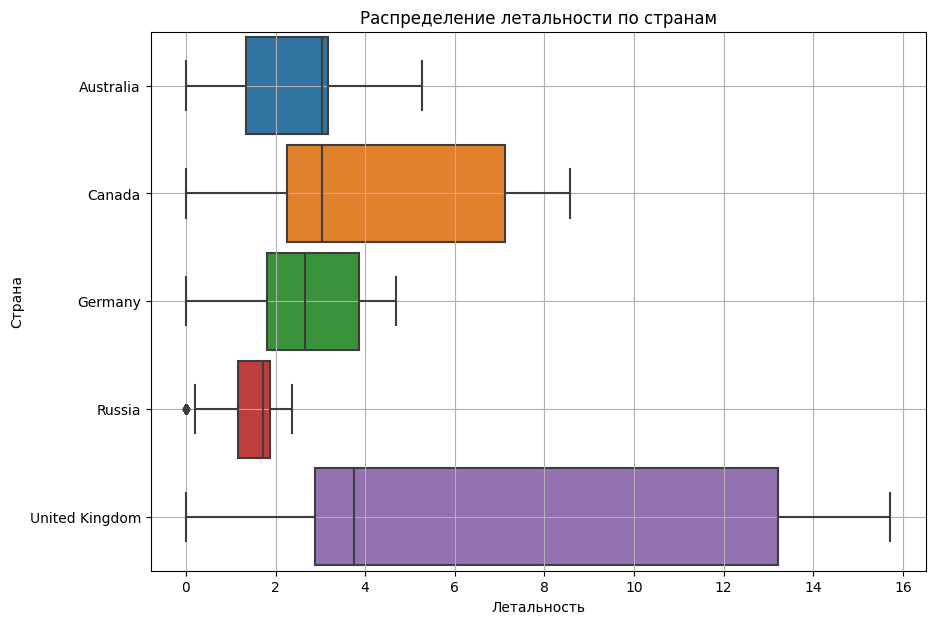